
# **Histogram Representations**

**In this lesson we'll learn:**
1. View the RGB Histogram representations of images
2. Use K-Means Clustering to get the dominant colors and their proportions in images


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image, title="", size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)



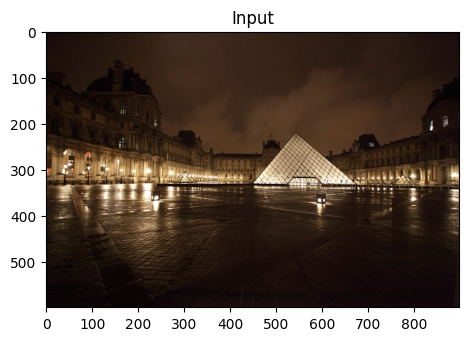

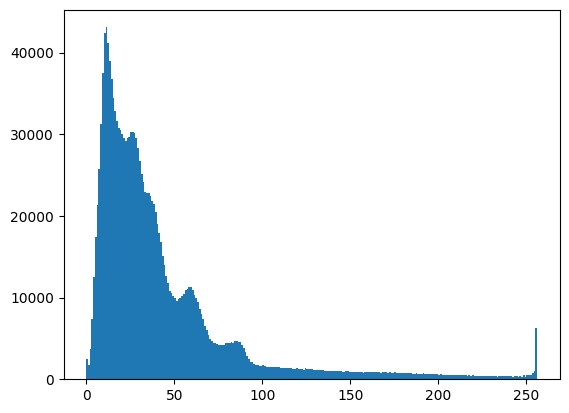

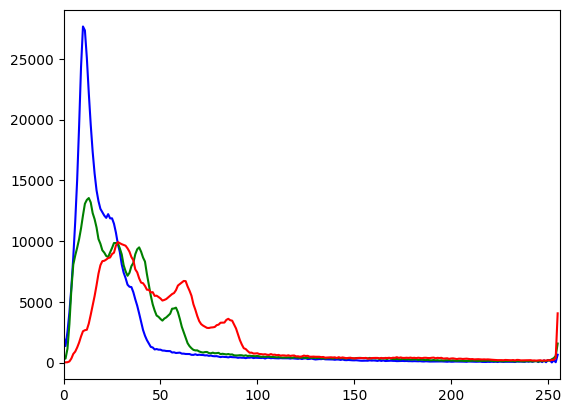

In [73]:
image= cv2.imread('images/louvre museum.jpg')
imshow(image, 'Input')
plt.show()

# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.show()

# Viewing Separate Color Channels
color=('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram= cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram, color= col)
    plt.xlim([0,256])
    
plt.show()

In [74]:
image.shape, image[0,0]

((600, 900, 3), array([ 7, 10, 15], dtype=uint8))

In [75]:
image.ravel().shape, image.ravel()[0]

((1620000,), np.uint8(7))

In [76]:
600*900*3

1620000

In [77]:
histogram = cv2.calcHist(image, [0], None, [256], [0, 256])
histogram.shape

(256, 1)

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
- **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
- **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
- **ranges** : this is our RANGE. Normally, it is [0,256].

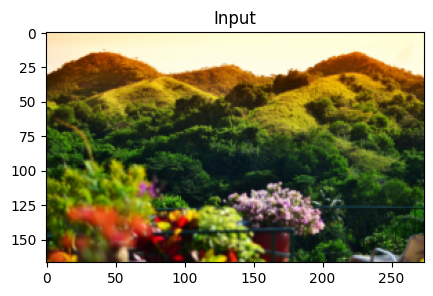

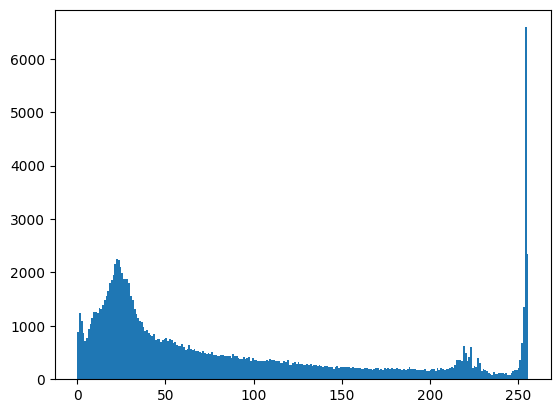

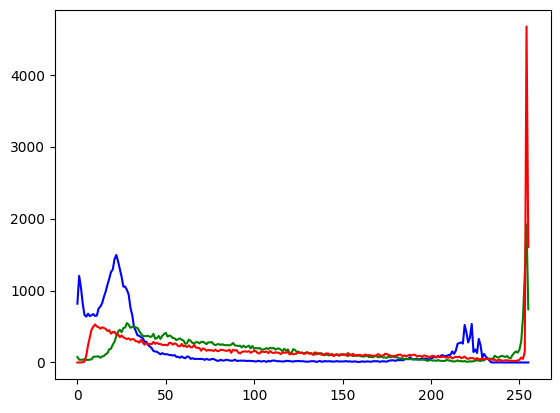

In [88]:
image= cv2.imread('images/tobago.png')
imshow(image, 'Input')
plt.show()

histogram= cv2.calcHist(image, [0], None, [256], [0,256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0,256])
plt.show()

# Viewing Separate Color Channels
colors= ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, color in enumerate(colors):
    histogram2= cv2.calcHist([image], [i], None, [256], [0,256])
    plt.plot(histogram2, color= color)
    #plt.xlim([0,256])
    
plt.show()

### **K-Means Clustering to obtain the dominant colors in an image**

In [161]:
from sklearn.cluster import KMeans

def CentroidHistogram(clt:KMeans):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    num_labels= np.arange(0, len(np.unique(clt.labels_))+1 )
    
    # Create our histogram 
    hist, bin_edges= np.histogram(clt.labels_, bins= num_labels)
    
    # normalize the histogram, so that it sums to one
    hist= hist.astype('float')
    hist/= hist.sum()
    
    return hist

def PlotColors(hist, centroids):
    # Create our blank barchart
    bar= np.zeros((100,500,3), dtype='uint8') 
    
    x_start=0
    # iterate over the percentage and dominant color of each cluster
    for percent, color in zip(hist, centroids):
        # plot the relative percentage of each cluster
        end= x_start + (percent*500)
        cv2.rectangle(bar, (int(x_start), 0), (int(end), 100), color.astype('uint8').tolist(), -1)
        x_start= end
    return bar

(167, 274, 3)
(45758, 3)


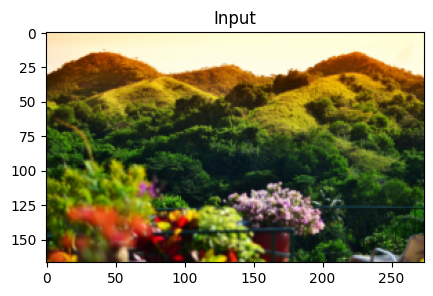

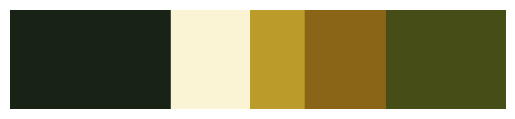

In [189]:
image= cv2.imread('images/tobago.png')
imshow(image, 'Input')

# We reshape our image into a list of RGB pixels
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

image= image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

n_clusters= 5
clt= KMeans(n_clusters= n_clusters)
clt.fit(image)

hist= CentroidHistogram(clt)
bar= PlotColors(hist, clt.cluster_centers_)

# show our color bar chart
plt.figure()
plt.axis(False)
plt.imshow(bar)
#plt.show()

In [163]:
clt

KMeans(n_clusters=5)

In [164]:
clt.labels_.shape, np.unique(clt.labels_)

((45758,), array([0, 1, 2, 3, 4], dtype=int32))

In [165]:
clt.cluster_centers_

array([[186.36206159, 161.59431138,  47.39349872],
       [ 26.22587691,  36.38038032,  21.53488372],
       [250.44244752, 244.66963918, 212.2421457 ],
       [ 75.01958515,  80.48090448,  23.04433366],
       [147.96096654, 101.87803832,  21.62768087]])

In [166]:
hist

array([0.10153416, 0.33948162, 0.1592727 , 0.2455964 , 0.15411513])

In [167]:
bar.shape

(100, 500, 3)

### **Let's try another image**

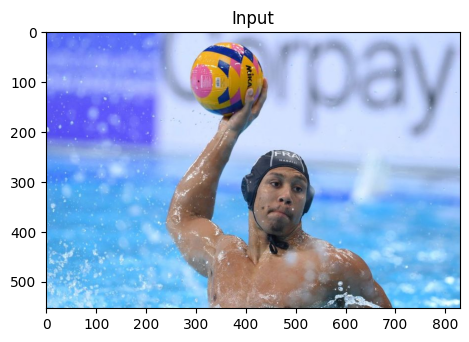

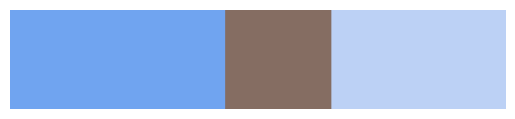

In [185]:
image= cv2.imread('images/volleyball.jpg')
imshow(image, 'Input')

# We reshape our image into a list of RGB pixels
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image= image.reshape((image.shape[0]*image.shape[1], 3))

n_clusters=3
clt= KMeans(n_clusters= n_clusters)
clt.fit(image)

hist= CentroidHistogram(clt)
bar= PlotColors(hist, clt.cluster_centers_)

# show our color bar chart
plt.figure()
plt.axis(False)
plt.imshow(bar)


In [170]:
hist

array([0.77738898, 0.13929581, 0.08331521])

In [173]:
clt.labels_.shape

(459820,)

In [174]:
clt.cluster_centers_

array([[145.39576502, 184.85429374, 243.62612618],
       [168.00663575, 135.15174794, 116.16423876],
       [ 79.96296489,  73.35661602,  76.62889312]])

In [178]:
bar.shape

(100, 500, 3)